 <h1 align="center">Find a car Park</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira & Shay Leyzerovich</h3>   

In this project we propose to develop a model for identifying whether there is free space in theparking lot image, or whether the parking is full.

# Report:

In this project we have classification problem. We wish to recognize whether the parking spot is full or free in an image. Our data set contains a huge amount of parking spots images. Therefore our features will be the images pixels and the label divided to free and full.

Preprocessing: Preparing Data- in order to use the data we needed to make some adjustments. 

- In the first stage we imported the data , the data was too big and cause hardware and memory problems- there was too many pictures and all of them with high quality.
    Thus we resized the pictures and took some samples from the data instead of all of it. 

- In the next stage we did label encoding 1 for free , 0 for full.

- We normalize all the data in order to clean noize from the images.

- In addition, we defined a random seed in order to compare between the models we built. 

- After that , we divide the set into two parts: 75% for training and 25% for testing.

- When we saw that we have a balancing problem- much more full parking spots than free. so we need to take it in account while splitting the data in order to have enough images with free parking spots in the training set but also to have some in the testing.

Building the logistic regression model:
At first, we build a basic model for our problem and check the results.

- The building details are detailed during the code.

- We improved the model by changing the function to sigmoid instead of the function we saw in class. 

- In order to avoid an overfitting problem we reduce the number of iteration.

More details:
Is during the code.

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:
- tensorflow v1
- sklearn

In [1]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
import cv2
import os
from tqdm import tqdm
import numpy as np
import random as rn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### fix random seed:

In [2]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

### import the data:

In [3]:
X = []
Z = []
IMG_SIZE=150
DATASET_SIZE_FREE = 1000
DATASET_SIZE_FULL = 2000
# FREE_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Free'
# FULL_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Full'
# fix me

FREE_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Free_half'
FULL_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Full_half_half'

In [4]:
# check on grayscale images: TODO

In [5]:
def make_train_data(label,DIR, number_of_images):
    i = 1
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
#         img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))
        if(i == number_of_images):
            break;
        else:
            i=i+1

In [6]:
# make 'Free' data
make_train_data('Free',FREE_DIR, DATASET_SIZE_FREE)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [00:02<00:00, 32.06it/s]

89


In [7]:
# make 'Full' data
make_train_data('Full',FULL_DIR, DATASET_SIZE_FULL)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:01<00:00, 32.40it/s]

143


### The description of the data:

1. Number of instances: ---

2. Number of attributes: --- (type here what is the feature)

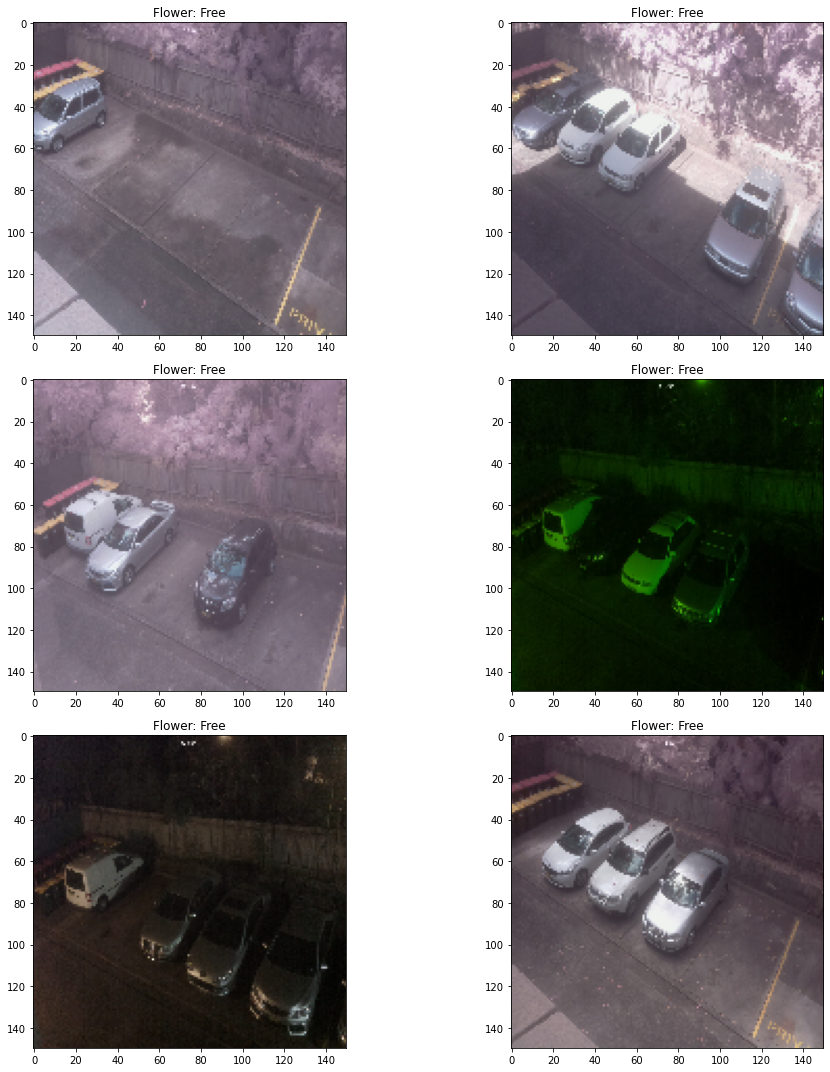

In [8]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Label encoding of the target:
'Free' = 1

'Full' = 0

In [9]:
le=LabelEncoder()
Y=le.fit_transform(Z)
# Y = pd.Series(Z).replace({'Free':1,'Full':0},inplace=True)

### normalization and flatten the images:

In [10]:
X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization
X=np.array(X)/255
X = X.flatten().reshape(len(X), (IMG_SIZE ** 2) * 3) # 3 is because it is RGB image 

#### our dataset:

In [11]:
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.094118,0.039216,0.101961,0.105882,0.047059,0.117647,0.176471,0.101961,0.156863,0.176471,...,0.474510,0.439216,0.478431,0.592157,0.368627,0.368627,0.474510,0.266667,0.282353,0.349020
1,0.109804,0.043137,0.121569,0.105882,0.043137,0.094118,0.164706,0.098039,0.160784,0.188235,...,0.478431,0.419608,0.443137,0.545098,0.364706,0.360784,0.466667,0.250980,0.258824,0.345098
2,0.109804,0.043137,0.094118,0.109804,0.035294,0.094118,0.176471,0.109804,0.156863,0.180392,...,0.462745,0.447059,0.454902,0.568627,0.372549,0.388235,0.470588,0.247059,0.270588,0.341176
3,0.109804,0.035294,0.094118,0.105882,0.039216,0.090196,0.156863,0.090196,0.141176,0.164706,...,0.435294,0.423529,0.450980,0.545098,0.376471,0.376471,0.439216,0.266667,0.286275,0.325490
4,0.129412,0.070588,0.129412,0.125490,0.082353,0.133333,0.235294,0.149020,0.203922,0.219608,...,0.596078,0.533333,0.603922,0.694118,0.635294,0.619608,0.666667,0.396078,0.423529,0.490196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.419608,0.274510,0.368627,0.403922,0.270588,0.349020,0.368627,0.250980,0.309804,0.345098,...,0.458824,0.345098,0.313725,0.352941,0.313725,0.282353,0.333333,0.584314,0.560784,0.666667
139,0.349020,0.254902,0.333333,0.494118,0.403922,0.462745,0.525490,0.372549,0.447059,0.400000,...,0.219608,0.192157,0.164706,0.211765,0.184314,0.149020,0.184314,0.192157,0.156863,0.192157
140,0.050980,0.125490,0.039216,0.066667,0.125490,0.035294,0.047059,0.105882,0.023529,0.066667,...,0.007843,0.011765,0.047059,0.000000,0.062745,0.113725,0.003922,0.054902,0.090196,0.003922
141,0.129412,0.094118,0.168627,0.156863,0.141176,0.196078,0.109804,0.098039,0.149020,0.145098,...,0.082353,0.113725,0.109804,0.098039,0.086275,0.078431,0.074510,0.066667,0.074510,0.054902


We can see that the size of an image is 150*150*3 = 67500 that later it would be our featrues in our models.

In [12]:
X.shape

(143, 67500)

### Train-Test Split:

When we saw that we have a balancing problem- much more full parking spots than free. so we need to take it in account while splitting the data in order to have enough images with free parking spots in the training set but also to have some in the testing.

In [13]:
# Maybe put normolize here

In [14]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42, shuffle=True)

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == 0).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == 0).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == 0).sum()+(y_test == 0).sum()]},
                     index=["Free", "Full"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Free,41,13,54
Full,66,23,89


We'll build a classifier with two classes: "full",
so we create the according labels.

In [15]:
labels_train = (np.arange(2) == y_train[:,None]).astype(np.float32)
labels_test = (np.arange(2) == y_test[:,None]).astype(np.float32)

Define the accuracy:

In [16]:
# def set_accuracy(output):
#     pred = tf.nn.softmax(output)
#     pred_label = tf.argmax(pred, 1)
#     correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(label, 1))
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Define a function that calculate the statistics:

In [17]:
def statistics(confusion):
    TP = sess.run(confusion[1, 1])
    TN = sess.run(confusion[0, 0])
    FP = sess.run(confusion[0, 1])
    FN = sess.run(confusion[1, 0])
    print('True Positives (TP):',TP)
    print('True Negatives (TN):',TN)
    print('False Positives (FP):',FP)
    print('False Negarives (FN):',FN)
    print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
    precision = TN / float(TN + FP)
    print('Precision:',precision)
    recall = TP / float(TP + FN)
    print('Recall:', recall)
    print('f-score:', 2 * precision * recall / (precision + recall))

### Begin building the Logistic-Regression model using tensorflow.v1:

1. Define placeholders

In [18]:
tf.compat.v1.disable_eager_execution()
data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

2. Declare the variables that need to be learned and initialization.
   
   The number of variable is the number of the features (X.shape[1], 1)

In [19]:
W = tf.Variable(tf.zeros(shape=[X.shape[1], 1])) # tf.random_normal maybe better
b = tf.Variable(tf.zeros(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

3. Declare the model you need to learn

In [20]:
mod = tf.matmul(data, W) + b
# y = 1 / (1.0 + tf.exp(-(tf.matmul(data,W) + b))) # tf.nn.sigmoid(tf.matmul(data,W) + b) maybe better

4. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [21]:
learning_rate = 0.003
batch_size = 15
iter_num = 300 # overfitting when it 5000

5. Loss function and optimizer:
    
    We use the sigmoid cross-entropy loss function,
    
    meaning, first doing a sigmoid on the model result and then using the cross-entropy loss function.

In [22]:
# We want to minimize the loss function using the Gradient-Decent method
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

6. Define the accuracy

In [23]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

### End of the definition of the model framework

In [24]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the  Logistic-Regression model:

In [25]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(optimizer, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 50 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:   50 loss: 0.943906 train_acc: 0.383178 test_acc: 0.361111
epoch:  100 loss: 0.302153 train_acc: 0.813084 test_acc: 0.666667
epoch:  150 loss: 0.235052 train_acc: 0.878505 test_acc: 0.638889
epoch:  200 loss: 0.314795 train_acc: 0.934579 test_acc: 0.611111
epoch:  250 loss: 0.252526 train_acc: 0.915888 test_acc: 0.694444
epoch:  300 loss: 0.099350 train_acc: 0.971963 test_acc: 0.722222


### Visualization of the loss function results:

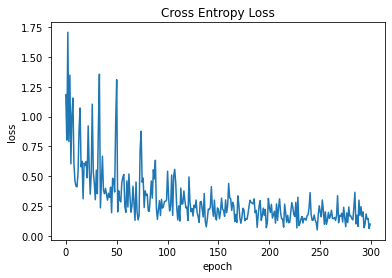

In [26]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can see that the loss value reduce during the train, there's a graph that shows that.

In [27]:
y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})

In [28]:
tf.compat.v1.math.confusion_matrix
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.float32)
print(sess.run(confusion))

[[17.  6.]
 [ 4.  9.]]


In [29]:
statistics(confusion)

True Positives (TP): 9.0
True Negatives (TN): 17.0
False Positives (FP): 6.0
False Negarives (FN): 4.0
Classification Accuracy: 0.7222222222222222
Precision: 0.7391304347826086
Recall: 0.6923076923076923
f-score: 0.7149532710280374


The results indicate that the model could not recognize a lot of free parking spot because of the recall but when it did the precision was high.

### Begin building the feed-forward neural network model using tensorflow.v1:

1. Define placeholders

In [30]:
inputs = tf.placeholder(tf.float32, shape=(None, X_train.shape[1]), name='inputs')
label = tf.placeholder(tf.float32, shape=(None, 2), name='labels')

2. Declare the variables that need to be learned and initialization.

In [31]:
# First layer
hid1_size = 128
w1 = tf.Variable(tf.random_normal([hid1_size, X_train.shape[1]], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(inputs)), b1)), keep_prob=0.5)

# Second layer
hid2_size = 256
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)

# Output layer
wo = tf.Variable(tf.random_normal([2, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([2, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


3. Declare the model you need to learn

In [32]:
y = 1 / (1.0 + tf.exp(yo))

4. Loss function and optimizer:

In [33]:
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=yo, labels=label))
loss = tf.reduce_mean(-(label * tf.log(y) + (1 - label) * tf.log( 1 - y)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

5. Define the accuracy

In [34]:
pred = tf.nn.softmax(yo)
pred_label = tf.argmax(pred, 1)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

5. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [35]:
learning_rate = 0.003
batch_size = 15
iter_num = 300 # overfitting when it 5000

### End of the definition of the model framework

In [36]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the feed-forward neural network model:

https://www.kaggle.com/hbaderts/simple-feed-forward-neural-network-with-tensorflow

In [39]:
for epoch in range(50):
    avg_loss = 0.0

    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(labels_train[batch_index])

    for i in range(batch_train_X.shape[0]):
        # Finally, this is where the magic happens: run our optimizer, feed the current example into X and the current target into Y
        sess.run(optimizer, feed_dict={inputs: batch_train_X[i, None], label: batch_train_y[i, None]})
        temp_loss = sess.run(loss, feed_dict={inputs: batch_train_X[i, None], label: batch_train_y[i, None]})
        avg_loss += temp_loss

    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = accuracy.eval(session=sess, feed_dict={inputs: X_train, label: labels_train})
    temp_test_acc = accuracy.eval(session=sess, feed_dict={inputs: X_test, label: labels_test})

    avg_loss /= batch_train_X.shape[0]
    
    # recode the result
    loss_trace.append(avg_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

    # output
#     if epoch % 10 == 0:
#             print("Epoch: {:3d}    Train Cost: {:.4f}".format(epoch, avg_loss))
    
    if (epoch + 1) % 10 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, temp_train_acc, temp_test_acc))

epoch:   10 loss: 0.446620 train_acc: 0.242991 test_acc: 0.361111
epoch:   20 loss: 0.186569 train_acc: 0.242991 test_acc: 0.333333
epoch:   30 loss: 0.572152 train_acc: 0.252336 test_acc: 0.444444
epoch:   40 loss: 0.627492 train_acc: 0.233645 test_acc: 0.388889
epoch:   50 loss: 0.477006 train_acc: 0.224299 test_acc: 0.388889


### Visualization of the loss function results:

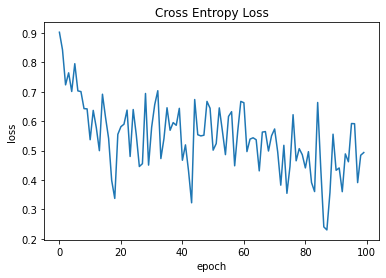

In [40]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [41]:
y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})

In [42]:
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.float32)
print(sess.run(confusion))

[[23.  0.]
 [13.  0.]]


In [43]:
statistics(confusion)

True Positives (TP): 0.0
True Negatives (TN): 23.0
False Positives (FP): 0.0
False Negarives (FN): 13.0
Classification Accuracy: 0.6388888888888888
Precision: 1.0
Recall: 0.0
f-score: 0.0


# LogisticRegression using sklearn

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

#### Function for computing the confusing matrix:

In [ ]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

In [ ]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

In [ ]:
cm_analysis(y_test, y_pred, log_reg.classes_)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy of Logistic Regression (cross-validation): ",cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean())